# Info 370 HW 06

Name: Ella Kim   

*Citations are hyperlinked*

## When will we see BOE?
#### 1

In [1]:
# imports
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

# load in data
df_raw = pd.read_csv('/home/jovyan/lost+found/INFO_370/north-ice-extent.csv.bz2', sep="\t", usecols = ["year", "mo", "data-type", "region", "extent", "area"])

# sanity checks
# print # cols
cols = df_raw.shape[1]
print("Number of columns: " + str(cols))
# print # rows
rows = df_raw.shape[0]
print("Number of rows: " + str(rows))
print(df_raw.head()) #sanity check

# filter null values from extent column
df_ice = df_raw[df_raw.extent != -9999.0]

Number of columns: 6
Number of rows: 512
   year  mo data-type region  extent   area
0  1978  11   Goddard      N   11.65   9.04
1  1978  12   Goddard      N   13.67  10.90
2  1979   1   Goddard      N   15.41  12.41
3  1979   2   Goddard      N   16.18  13.18
4  1979   3   Goddard      N   16.34  13.21


#### 2

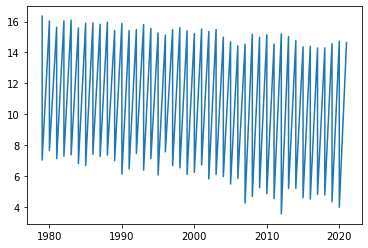

In [2]:
# filter df for only march (3) and september (9)
df_sep_mar = df_ice[(df_ice.mo == 3) | (df_ice.mo == 9)]

# plot results 
plt.plot(df_sep_mar.year, df_sep_mar.extent)
plt.show()

#### 3

[Cite .copy() to rid of error message](https://stackoverflow.com/questions/46347732/create-new-column-throws-pandas-error-despite-following-loc-recommendation)

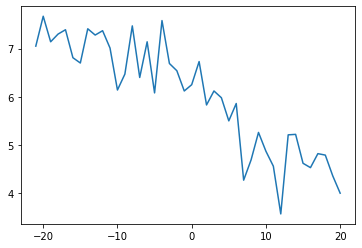

                            OLS Regression Results                            
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     157.1
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.95e-15
Time:                        23:30:00   Log-Likelihood:                -31.330
No. Observations:                  42   AIC:                             66.66
Df Residuals:                      40   BIC:                             70.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9773      0.081     74.036      0.0

In [3]:
# filter only for september extents
df_sep = df_ice[df_ice.mo == 9]

# make copy for warning message in next line
df_sep = df_sep.copy()

# change year so 2000 = 0
df_sep.year = df_sep.year - 2000

# plot resulting change in year 
plt.plot(df_sep.year, df_sep.extent)
plt.show()

# solve simple regression 
m_sep = smf.ols("extent ~ year", data=df_sep).fit()
print(m_sep.summary())

#### 4

Beta_0 = 5.9773 and beta_1 = -0.0834: the intercept means that at 2000, the extent is estimated to be ~ 5.98 M km^2 and the slope (yearly effect) means that for every increase in one year, the extent decreases ~ -0.08 M km^2, so it is not huge in magnitude, so I would initially think that it is not significant, but when you look at the CI (does not include 0) and p-value (0.000 << 0.05), it is significant.

#### 5

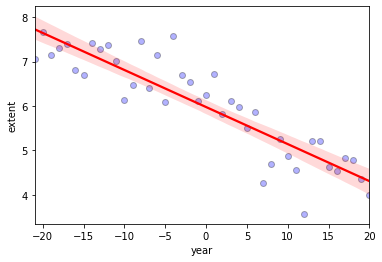

In [4]:
# plot points with regression line
sns.regplot(x = "year", y = "extent",
            scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
            line_kws = {"color":"red"},
            data = df_sep)
plt.show()

There is a clear negative (i.e. inverse/indirect) relationship between year and extent. Generally, the trend seems to be accelerating, but that is when I compare chunks of years (i.e. -20:-5 vs -5:5). It is not significant enough that the trend is clearly not a non-linear relationship. 

#### 6

Solve: 0 = -0.0834(year) + 5.9773, gives a relative year of 71.67, so we will have BOE during August of 2071 (or 2072 rounded to nearest whole). However, as the note #2 in the instructions states, this will most likely actually occur between 2051-2061. 

#### 7

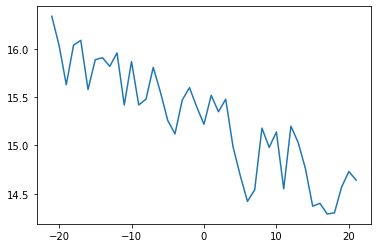

                            OLS Regression Results                            
Dep. Variable:                 extent   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     160.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           8.96e-16
Time:                        23:30:01   Log-Likelihood:                -1.3365
No. Observations:                  43   AIC:                             6.673
Df Residuals:                      41   BIC:                             10.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.2570      0.039    391.380      0.0

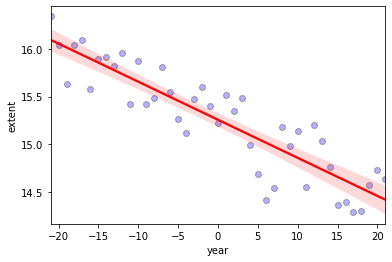

In [5]:
# filter only for march extents
df_mar = df_ice[df_ice.mo == 3]

# make copy for warning message in next line
df_mar = df_mar.copy()

# change year so 2000 = 0
df_mar.year = df_mar.year - 2000

# plot resulting change in year 
plt.plot(df_mar.year, df_mar.extent)
plt.show()

# solve simple regression 
m_mar = smf.ols("extent ~ year", data=df_mar).fit()
print(m_mar.summary())

# plot points with regression line
sns.regplot(x = "year", y = "extent",
            scatter_kws = {"color":"blue", "alpha":0.3, "edgecolor":"black"},
            line_kws = {"color":"red"},
            data = df_mar)
plt.show()

Using the new intercept (15.2570) and slope coeffcient (-0.0398), 0 = -0.0398(year) + 15.2570: which gives 2383.34 (during March 2383), but actually in 2363-2673 when Note 2 is taken into account. 

## How Is Basketball Game Score Calculated?
#### 1

In [6]:
# load in data
df_raw_1 = pd.read_csv('/home/jovyan/lost+found/INFO_370/harden-18-19.csv.bz2', sep=",")

# sanity checks
# print # cols
cols = df_raw_1.shape[1]
print("Number of columns: " + str(cols))
# print # rows
rows = df_raw_1.shape[0]
print("Number of rows: " + str(rows))
df_raw_1.head() #sanity check

Number of columns: 30
Number of rows: 82


,Rk,G,Date,Age,Tm,Unnamed: 5,Opp,Unnamed: 7,GS,MP,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1.0,2018-10-17,29-052,HOU,NaN,NOP,L (-19),1,34:43,...,7,9,10,3,1,4,2,18,18.9,-23
1,2,2.0,2018-10-20,29-055,HOU,@,LAL,W (+9),1,37:50,...,6,7,5,2,1,6,2,36,27.0,-3
2,3,3.0,2018-10-21,29-056,HOU,@,LAC,L (-3),1,39:45,...,4,4,14,2,0,3,1,31,26.4,+5
3,4,4.0,2018-10-24,29-059,HOU,NaN,UTA,L (-11),1,31:38,...,4,5,7,1,0,7,4,29,17.7,-5
4,5,NaN,2018-10-26,29-061,HOU,NaN,LAC,L (-20),Inactive,Inactive,...,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive,Inactive


#### 2

In [7]:
# filter rows that have G = NaN bc that means he did not play that game:
df_harden = df_raw_1[~df_raw_1.G.isna()]
print("Games played: " + str(len(df_harden.G)))

Games played: 78


#### 3

In [8]:
df_nulls = df_harden.isnull().sum() # no nulls except one in ft%

# change all relevant columns to numerical values
df_harden = df_harden.copy()
cols = ['GS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'GmSc', '+/-']
df_harden[cols] = df_harden[cols].apply(pd.to_numeric, errors='coerce')
#df_harden.dtypes # sanity check

#### 4

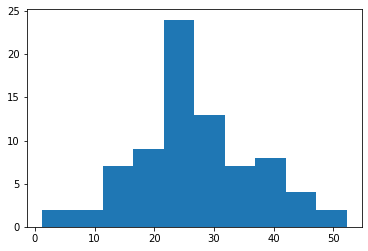

Range: 51.0
Mean: 26.70897435897436
Standard Deviation: 10.053883218218111


In [9]:
plt.hist(df_harden.GmSc)
plt.show()

print("Range: " + str(max(df_harden.GmSc) - min(df_harden.GmSc)))
print("Mean: " + str(st.mean(df_harden.GmSc)))
print("Standard Deviation: " + str(st.stdev(df_harden.GmSc)))

The distribution unimodal which no apparent skew, as it almost looks normal except for the fact that the highest node being much more larger in frequency than the others. 

#### 5

In [10]:
m_simple = smf.ols("GmSc ~ FGA", data=df_harden).fit()
print(m_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     13.54
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           0.000433
Time:                        23:30:01   Log-Likelihood:                -283.80
No. Observations:                  78   AIC:                             571.6
Df Residuals:                      76   BIC:                             576.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.5963      4.240      2.735      0.0

##### A: 
Intercept = 11.5963: this means that when there are 0 Field Goal Attemps, there is ~ 12 game scores 

##### B:
Slope = 0.6175: this means that for every field goal attempt, there is an increase in ~ 1 game point. As these goals are either 2 or 3 points, it is significant because it shows that for one field goal attempt, the attempt would not be successful. To have a successful field goal, there would have to be at least 4 FDAs.


#### 6

In [11]:
m_fg_fga = smf.ols("GmSc ~ FG + FGA", data=df_harden).fit()
print(m_fg_fga.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     50.42
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.33e-14
Time:                        23:30:01   Log-Likelihood:                -256.97
No. Observations:                  78   AIC:                             519.9
Df Residuals:                      75   BIC:                             527.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8608      3.075      2.231      0.0

##### A: 
FG = 3.4082: this means for every field goal, the game score will increase by ~ 3 points. As field goals are only 2 or 3 points, this does not seem possible but if we were to only assess values to the nearest whole number then it could be considered statsitically significant.

##### B: 
FGA = -0.6940: this means for every field goal attempt, the game score will decrease by ~ 1 point. I do not think realistially game score decreases, so it does not seem to be a statistically significant value. But if taken into account for its affect and FG, it makes sense for the total GS from these two factors to be 2.7862 for each increase in an attempt and a FG (meaning it was successful) as the game score should increase by either 2 or 3.

##### C: 
To be put simple, there can be a change in coefficient values as there is now multiple explanatory variables that will affect the game score, so they will not have as of an explicit influence as it would have done by itself (i.e. it is also influenced by the trend FD has). 

##### D: 
R^2 for Model 5 = 0.151, R^2 for Model 6 = 0.573. 
In comparison to Model 5, Model 6's R^2 is much better, which would make me conclude that there is a stronger correlation between the multiple explanatory variables and game score than only FGA and game score. 

#### 7

In [12]:
m_pf_fg_fga = smf.ols("GmSc ~ FG + FGA + PF", data=df_harden).fit()
print(m_pf_fg_fga.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     36.24
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           1.61e-14
Time:                        23:30:01   Log-Likelihood:                -254.94
No. Observations:                  78   AIC:                             517.9
Df Residuals:                      74   BIC:                             527.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.9447      3.393      2.931      0.0

##### A: 
The coefficients for FG and FGA stayed relatively similar except for decreasing slightly in magnitude, but PF is also negative. This seems to follow the pattern of an action in basketball that is bad for the team tends to have a negative coefficient so it seems statistically significant. Its affect on the game score is greater than a FGA, which would make sense as it is a worse action to have than FGA.
##### B: 
Like stated above, it has an affect in that the magnitude of their effects are decreased, but not in a huge amount each. 
##### C: 
The R^2 is 0.595, which is an increase from Model 6, but not by much (vs the Model 6's R^2 0.573).

#### 8

[Cite renaming 3P & 3PA](https://www.geeksforgeeks.org/how-to-rename-columns-in-pandas-dataframe/) (as function could not recognize name with number starting column name)

In [13]:
df_harden.rename(columns={"3P": "ThrP", "3PA": "ThrPA"}, inplace = True)
m_mar = smf.ols("GmSc ~ FG + FGA + ThrP + ThrPA + FT + FTA + ORB + DRB + AST + STL + BLK + TOV + PF + PTS", data=df_harden).fit()
print(m_mar.summary())

                            OLS Regression Results                            
Dep. Variable:                   GmSc   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.035e+29
Date:                Tue, 03 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:30:01   Log-Likelihood:                 2253.2
No. Observations:                  78   AIC:                            -4478.
Df Residuals:                      64   BIC:                            -4445.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.066e-14   5.39e-14     -0.198      0.8

##### A: 
The standard errors are all nearly 0 and could easily be rounded as such. The t-values (besides intervept and 3PA are all very large numbers in magnitude, which would imply that these values are statistically significantly different from one another (aside form the two variables mentioned previously). 
##### B: 
The R^2 is 1 exactly, which means each point in the plot prefectly matches the regression equation made for these variables. That means that with this regression model, it would prefectly calculate the game points of the different matches given in this data, i.e. it would accurately calculate the game score of the games harden played this season. 
##### C: 
Bad, as the turnover has a -1 coefficient, meaning that whenever there is a turnover, the game score for them will decrease a whole point. 

#### 9


Points (1) vs PTS (1.0286); Field Goals Made (.4) vs FG (.34); Offensive Rebounds (.7) vs ORB (.7); Defensive rebounds (.3) vs DRB (.3); Steals (1) vs STL (1); Assists (.7) vs AST (.7); Blocked Shots (.7) vs BLK (.7); Field Goal Attempts (-.7) vs FGA (-.7); Free Throws Missed (-.4) vs FTA (-.4); Personal Fouls (-.4) vs PF (-.4), Turnovers (-1) vs TOV (-1):  
In summary, I recovered the exact same formulas for each of the coefficients except for a couple that were very close (i.e. Points). 

## Interpret regression results in the literature
#### 1

Unlike game scores in basketball, the higher the PHQ-9 score the more severe depression. the coefficient for having a partner is -0.47 and a p value of 0.150. While the -0.47 indicates that it improves mental health of patients, the p value is much higher than any of the typical accepted alpha values, so it is not statistically significant. 

#### 2

Covid exposure has a positive coefficient (0.24), meaning it worsens the mental health of a patient, but just like the patient having a partner, the p value is too high to allow this coefficient to have any statistical significance. 

#### 3

Financial distress is extremely related to mental health, as it is the variable with the largest positive coefficient, meaning that it worsens the mental health of the patient the most out of all these explanatory variables. The effect is statistically significant as it is < 0.001, the smallest alpha tested in this data. 

## Total Hours:
~ 5 hours